<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.2 Linear Regression

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [9]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

### 1. Explore Data

Perform EDA on this dataset. Find Dependent and Independent Variables to predict house price.

In [3]:
# Read CSV
house_csv = "Sacramento_transactions.csv"
data = pd.read_csv(house_csv)

In [4]:
data.head()

street        city    zip state  beds  baths  sq__ft  \
0      3526 HIGH ST  SACRAMENTO  95838    CA     2      1     836   
1       51 OMAHA CT  SACRAMENTO  95823    CA     3      1    1167   
2    2796 BRANCH ST  SACRAMENTO  95815    CA     2      1     796   
3  2805 JANETTE WAY  SACRAMENTO  95815    CA     2      1     852   
4   6001 MCMAHON DR  SACRAMENTO  95824    CA     2      1     797   

          type                     sale_date  price   latitude   longitude  
0  Residential  Wed May 21 00:00:00 EDT 2008  59222  38.631913 -121.434879  
1  Residential  Wed May 21 00:00:00 EDT 2008  68212  38.478902 -121.431028  
2  Residential  Wed May 21 00:00:00 EDT 2008  68880  38.618305 -121.443839  
3  Residential  Wed May 21 00:00:00 EDT 2008  69307  38.616835 -121.439146  
4  Residential  Wed May 21 00:00:00 EDT 2008  81900  38.519470 -121.435768

In [36]:
data.street.value_counts()

7 CRYSTALWOOD CIR       2
1223 LAMBERTON CIR      2
4734 14TH AVE           2
8306 CURLEW CT          2
9507 SEA CLIFF WAY      1
                       ..
4225 46TH AVE           1
4085 COUNTRY DR         1
2636 TRONERO WAY        1
1347 HIDALGO CIR        1
4741 PACIFIC PARK DR    1
Name: street, Length: 981, dtype: int64

In [47]:
data['street_name'] = data.street.apply(lambda x: x[x.find(' ')+1:len(x)])

In [46]:
street_name.value_counts()

CRYSTALWOOD CIR     33
E ST                 9
22ND AVE             4
1ST ST               4
14TH AVE             3
                    ..
CRESTA WAY           1
BLACKMAN WAY         1
MAPLEPLAIN AVE       1
ANGELINA AVE         1
HAMPTON COVE WAY     1
Name: street, Length: 872, dtype: int64

In [48]:
import category_encoders as ce

In [49]:
street_name_encoded = pd.get_dummies(data=data['street_name'],drop_first=False)

In [50]:
street_name_encoded.head()

10TH AVE  10TH ST  11TH AVE  12TH AVE  14TH AVE  17TH AVE  19TH AVE  \
0         0        0         0         0         0         0         0   
1         0        0         0         0         0         0         0   
2         0        0         0         0         0         0         0   
3         0        0         0         0         0         0         0   
4         0        0         0         0         0         0         0   

   1ST ST  20TH AVE  21ST AVE  ...  WOODSIDE DR  WOODYARD WAY  WRINGER DR  \
0       0         0         0  ...            0             0           0   
1       0         0         0  ...            0             0           0   
2       0         0         0  ...            0             0           0   
3       0         0         0  ...            0             0           0   
4       0         0         0  ...            0             0           0   

   Y ST  YARNELL WAY  YELLOWSTONE LN  YORK GLEN WAY  YORKTON WAY  YOUNGS AVE  \
0     0            0               0              0            0           0   
1     0            0               0              0            0           0   
2     0            0               0              0            0           0   
3     0            0               0              0            0           0   
4     0            0               0              0            0           0   

   YUMA CT  
0        0  
1        0  
2        0  
3        0  
4        0  

[5 rows x 872 columns]

### 2. Predict Price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

In [5]:
# ANSWER Target variable is the price as it is being predicted

#### 2.2 List all possible variables which might be Independent/Predictor variable.

In [6]:
# ANSWER Independent/Predictor variables = beds, bath, sq_ft, type, latitude, longitude

#### 2.3 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

In [7]:
# ANSWER
data.corr()


zip      beds     baths    sq__ft     price  latitude  \
zip        1.000000  0.125319  0.069165  0.130108 -0.093353 -0.290389   
beds       0.125319  1.000000  0.839650  0.684041  0.342024 -0.291307   
baths      0.069165  0.839650  1.000000  0.665690  0.416208 -0.235792   
sq__ft     0.130108  0.684041  0.665690  1.000000  0.333897 -0.383274   
price     -0.093353  0.342024  0.416208  0.333897  1.000000 -0.039573   
latitude  -0.290389 -0.291307 -0.235792 -0.383274 -0.039573  1.000000   
longitude -0.539904 -0.053993  0.016582 -0.177742  0.284485  0.387925   

           longitude  
zip        -0.539904  
beds       -0.053993  
baths       0.016582  
sq__ft     -0.177742  
price       0.284485  
latitude    0.387925  
longitude   1.000000

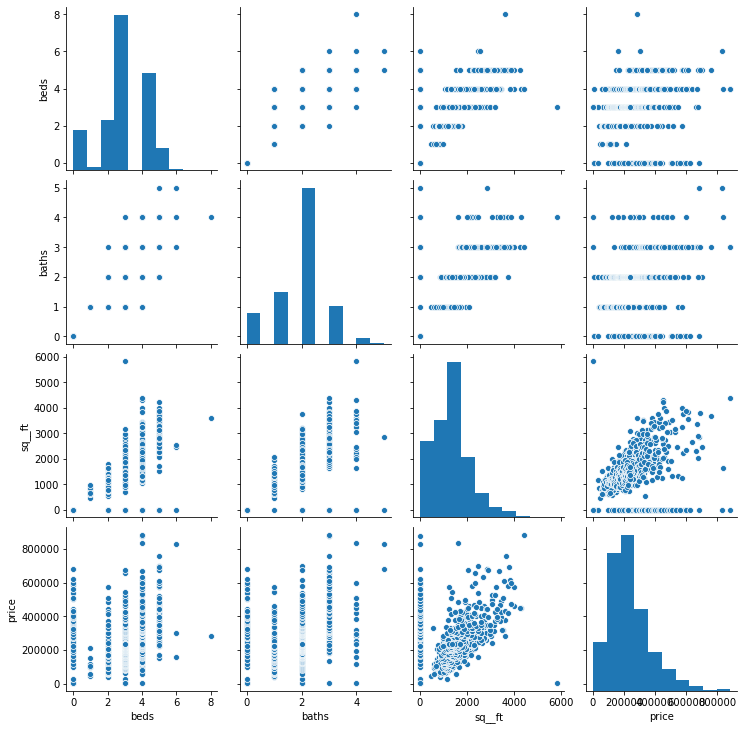

In [18]:
colnames=['beds','baths','sq__ft','price']
sns.pairplot(data[colnames])

### Answer:
Best predictor is baths as it has the highest correlation coefficient with price

#### 2.4 Find Coefficient and Intercept using Linear Regression

Using LinearRegression of sklearn.linear_model package find Coefficient and Intercept.

Create an instance of LinearRegression.

Explore following methods:

- fit
- predict
- score

In [10]:
from sklearn.linear_model import LinearRegression

##### 2.4.1 Fit predictor and target variables using linear regression 

In [29]:
# ANSWER
print(data['sq__ft'].values.shape)
colnames_reg=['beds','baths','sq__ft']
#X = data['sq__ft'].values.reshape(-1,1)
X = data[colnames_reg].values
print(X.shape)

Y = data['price']

(985,)
(985, 3)


##### 2.4.2 Find R Score

Find $R^2$ Using ```score``` method of Linear Regression.

In [30]:
# ANSWER
reg = LinearRegression().fit(X,Y)
reg.score(X,Y)

0.18055988065088857

### 3. Splitting Data

In [31]:
from sklearn.model_selection import train_test_split

#### 3.1 Create training and testing subsets

Hint: Using `train_test_split` Library.

```
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
```

In [32]:
# ANSWER
## Create training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.3, random_state=42)

#### 3.2 Check Shape, Sample of Test Train Data

In [33]:
# ANSWER
## Check training/test data
print(X_train.shape)
print(X_test.shape)


(689, 3)
(296, 3)


#### 3.3 Using Linear Regression Find The Score

1. Fit model using X_train, y_train
2. Find score using X_test, y_test

In [34]:
# ANSWER
reg1 = LinearRegression().fit(X_train,y_train)
print(reg1.score(X_train,y_train))

0.1728216106351652


In [35]:
# ANSWER
reg1.score(X_test,y_test)

0.18429336373123117

### 4. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house using linear regression model.**

In [42]:
# ANSWER

#### Find the error

In [ ]:
# Predict price from X_test



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



